# Комментарий:
### Изначально вместо SoftMax Regression реализовала One-vs-All (невнимательно посмотрела на задание). В итоге поняв, что метод не тот, сделала нужным. One-vs-All оставила, потому что было жалко удалять.

# Part 1. Vanilla logistic regression

## Recap.

### Sigmoid function

$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$
$$ \sigma(x, w) = \frac{1}{1 + exp(-<x, w>)} $$

### Class predictions

$$ P(y = 1 | x, w) = \sigma(x, w) $$

### Log Loss

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

### Training

$$ Q = L(y, p) = L(w) \rightarrow min $$
<br>
$$ \frac{dQ}{dw} = ??? $$
<br>
<center>Use chain rule and sigmoid function properties!</center>

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def logit(x, w):
    return np.dot(x,w)

def sigmoid(h):
    return 1./(1+np.exp(-h))

In [ ]:
class VanillaLogisticRegression(object):
    '''
    A simple logistic regression for binary classification with gradient descent
    '''

    def __init__(self, learning_rate=0.1, max_iter=100000, tolerance=1e-15):
        # Learning rate for gradient descent
        self._lr = learning_rate

        self._max_iter = max_iter

        # How often to print validation info
        self._validation_freq = 5000

        # Convergence criteria
        self._tolerance = tolerance


    def fit(self, X, y):
        # Add extra dummy feature (x[0] = 1) for bias in linear regression
        X = self.__add_intercept(X)
        n_objects, n_features = X.shape
        print(X.shape)

        # Initialize randomly
        self._weights = np.random.random(n_features)
        print(self._weights.shape)
        # Iterative gradient descent
        for i in range(self._max_iter):
            '''
            Compute logits, gradient, and update weights
            '''
            h = logit(X, self._weights)
            z = sigmoid(h)

            grad = np.dot(X.T, (z-y)) / len(y)
            self._weights -= self._lr * grad

            if (np.linalg.norm(self._lr * grad) < self._tolerance):
                print("Converged in {} iterations!".format(i))
                break

            if i % self._validation_freq == 0:
                # Compute probabilities
                # p =
                h = logit(X, self._weights)
                p = sigmoid(h)

                # Clip values for numeric stability in logarithm
                p = np.clip(p, 1e-10, 1 - 1e-10)

                # Compute log loss and accuracy
                loss = self.__loss(y, p)
                acc = np.mean((p >= 0.5) == y)

                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))


    def predict(self, X, threshold=0.5):
        X = self.__add_intercept(X)

        return sigmoid(logit(X, self._weights)) >= threshold


    def predict_proba(self, X):
        X = self.__add_intercept(X)

        return sigmoid(logit(X, self._weights))


    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


    def __loss(self, y, p):
        return np.mean(y * np.log(p) + (1-y) * np.log(1-p))

In [ ]:
X, y = sklearn.datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [ ]:
clf = VanillaLogisticRegression()

clf.fit(X, y)

print(clf._weights)
a, b, c = clf._weights

(100, 3)
(3,)
Iteration 0: Loss = -0.6460412190256402. Accuracy = 0.64
Iteration 5000: Loss = -0.26070218251895294. Accuracy = 0.93
Iteration 10000: Loss = -0.26070218161827174. Accuracy = 0.93
Iteration 15000: Loss = -0.2607021816182717. Accuracy = 0.93
Converged in 17295 iterations!
[0.99809371 3.35588318 0.70223695]


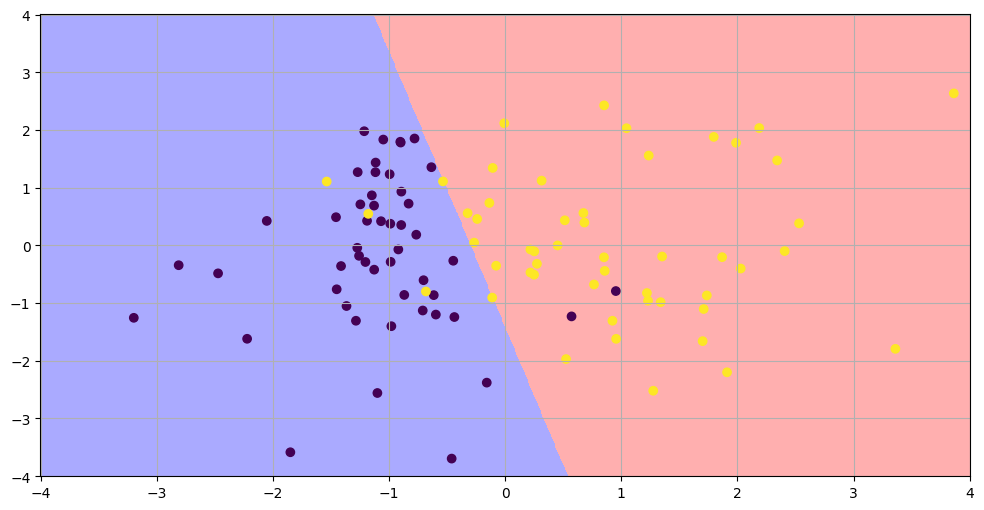

In [ ]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 6))
xx, yy = np.meshgrid(np.linspace(-4, 4, 1000), np.linspace(-4, 4, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))

plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

plt.show()

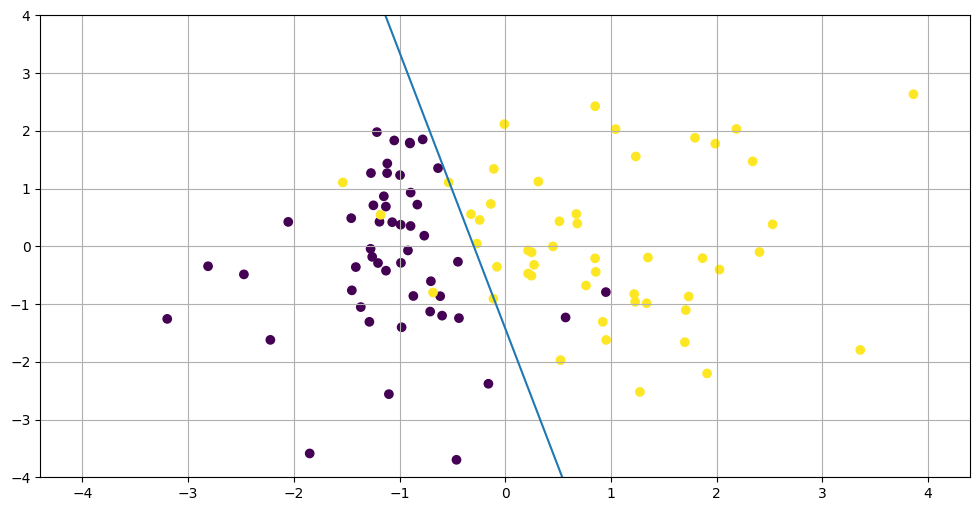

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X[:,0], X[:,1], c=y)

xx = np.linspace(-4, 4, 200)
yy = -a / c - xx * b / c
plt.plot(xx, yy)

plt.grid()
plt.ylim((-4, 4))

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(C=1000, fit_intercept=True)
clf.fit(X, y)
y_predicted = clf.predict(X)

print(np.append(clf.intercept_, clf.coef_))
print(accuracy_score(y, y_predicted))

[0.99741685 3.35419466 0.70175768]
0.93


# Part 2. Multiclass and regularization


### Softmax function

$$ SoftMax(z)_{j} = \frac{exp(z_{j})}{\sum{exp(z_{i})}} $$
<br>
$$ P(y | x, w) = SoftMax(w_{y}, x) = \frac{exp(<w_{y}, x>)}{\sum{exp(<w_{i}, x>)}} $$
<br>
$$ LogLoss(y_t, y_p) = -log P(y_t | x, w) $$

### Regularization

$$ Q(w) = L(w) + \beta R(w) \rightarrow min $$
<br>
<br>
$$ R(w) = ||w||_{1} $$
<br>
$$ R(w) = ||w||_{2} $$
<br>
$$ R(w) = \lambda ||w||_{1} + (1 - \lambda) ||w||_{2} $$

HW1


In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# One-VS-All:

In [ ]:
centers=3

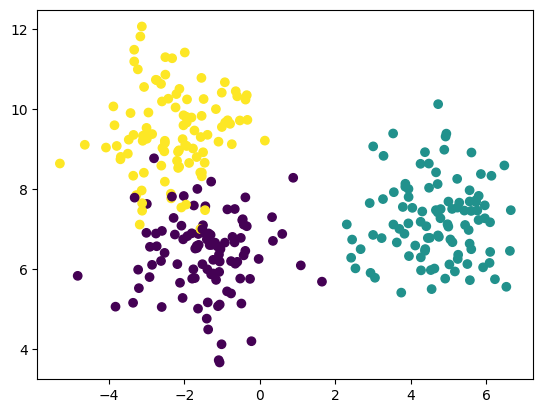

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=300, n_features=2, centers=centers,
                  shuffle=True, random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
def logit(X, w):
    return np.dot(X, w)

def sigmoid(h):
    return 1./(1+np.exp(-h))

In [ ]:
class MulticlassLogisticRegression(LogisticRegression):
    def __init__(self, learning_rate=0.1, max_iter=10000, tolerance=1e-15, regularization_strength=1.0):
        super().__init__(max_iter = max_iter, tol = tolerance)
        self._validation_freq = 1000
        self._lr = learning_rate

    def fit(self, X, y):
        classes = len(set(y))
        X = self.__add_intercept(X)
        self._X = X;
        n_objects, n_features = X.shape
        y1 = np.zeros([X.shape[0], centers])
        for i in range(y.shape[0]):
            y1[i, y[i]] = 1
        print(y1.shape)
        print(len(y1))
        self._y1 = y1;
        self._weights = np.random.random((n_features, classes))
        for i in range(self.max_iter):
            total_tolerence = 0
            for j in range(classes):
                h = logit(X, self._weights[:, j])
                z = sigmoid(h)

                save_tolerence = np.zeros([1, self._weights.shape[0]])
                for k in range(self._weights.shape[0]):
                    grad = np.sum((z-y1[:, j])*X[:, k])/len(y)
                    self._weights[k, j] -= self._lr * grad
                    save_tolerence[0, k] = np.linalg.norm(self._lr * grad) < self.tol

                if (np.sum(save_tolerence) == self._weights.shape[0]):
                    total_tolerence = total_tolerence + 1

            if i % self._validation_freq == 0:
                cur_vars = np.zeros([centers, X.shape[0]])
                for j in range(centers):
                    h = logit(X, self._weights[:, j])
                    p = sigmoid(h)
                    p = np.clip(p, 1e-10, 1 - 1e-10)
                    cur_vars[j, :] = p

                # Compute log loss and accuracy
                    loss = self.__loss(y1, np.transpose(cur_vars))

                    acc = 0
                    for col in range(centers):
                        for row in range(X.shape[0]):
                            if (y1[row, col] == 1 and cur_vars[col, row] >= 0.5):
                                acc += 1
                    acc = acc/len(X)

                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

            if (total_tolerence == classes):
                print("Converged in {} iterations!".format(i))
                break

    def predict(self, X, threshold=0.5):
        X = self.__add_intercept(X)

        return sigmoid(logit(X, self._weights)) >= threshold


    def predict_proba(self, X):
        X = self.__add_intercept(X)

        return sigmoid(logit(X, self._weights))


    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def __loss(self, y, p):
        return np.mean(y * np.log(p) + (1-y) * np.log(1-p))

In [ ]:
clf = MulticlassLogisticRegression(max_iter=10000, tolerance=1e-4)

clf.fit(X, y)

print(clf._weights)
a1, b1, c1 = clf._weights[:, 0]
a2, b2, c2 = clf._weights[:, 1]
a3, b3, c3 = clf._weights[:, 2]

(300, 3)
300
Iteration 0: Loss = -1.4191299671812576. Accuracy = 0.9
Iteration 1000: Loss = -0.20012912275163006. Accuracy = 0.9033333333333333
Iteration 2000: Loss = -0.15858431008496585. Accuracy = 0.9166666666666666
Iteration 3000: Loss = -0.1390716050204241. Accuracy = 0.9266666666666666
Iteration 4000: Loss = -0.12776370223951264. Accuracy = 0.93
Iteration 5000: Loss = -0.12039546328711712. Accuracy = 0.93
Iteration 6000: Loss = -0.11522473210264732. Accuracy = 0.93
Iteration 7000: Loss = -0.11140615786104897. Accuracy = 0.93
Iteration 8000: Loss = -0.10847913478617761. Accuracy = 0.9333333333333333
Iteration 9000: Loss = -0.10617088890845211. Accuracy = 0.9333333333333333
[[ 13.21769605  -0.30035828 -14.73188304]
 [ -0.78981431   4.25571218  -0.86124657]
 [ -1.91908877  -1.11530589   1.67334985]]


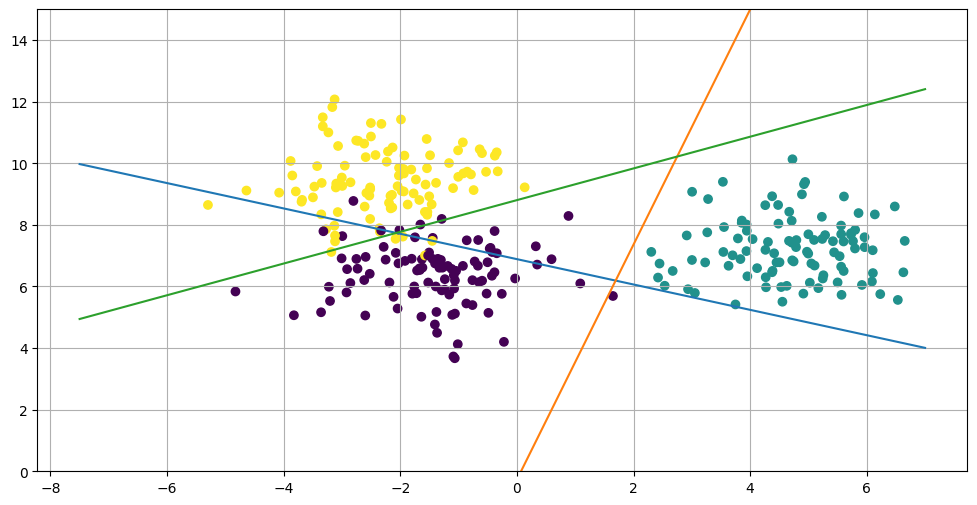

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(X[:,0], X[:,1], c=y)

xx = np.linspace(-7.5, 7, 200)
yy = -a1 / c1 - xx * b1 / c1
plt.plot(xx, yy)
yy = -a2 / c2 - xx * b2 / c2
plt.plot(xx, yy)
yy = -a3 / c3 - xx * b3 / c3
plt.plot(xx, yy)
plt.grid()
plt.ylim((0, 15))

plt.show()

# SoftMax Regression:

In [ ]:
centers=4

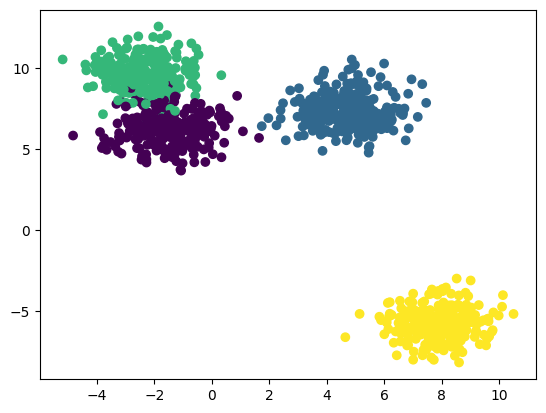

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=1000, n_features=2, centers=centers,
                  shuffle=True, random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
def SoftMax(z):
    a = np.exp(z)
    b = np.sum(a, axis = -1, keepdims = True)
    return a/b

## No regularization:

In [ ]:
class MulticlassLogisticRegression(LogisticRegression):
    def __init__(self, learning_rate=0.1, max_iter=10000, tolerance=1e-15, regularization_strength=1.0):
        super().__init__(max_iter=max_iter, tol=tolerance)
        self._regularization_strength = regularization_strength;
        self._validation_freq = 1000;
        self._lr = learning_rate

    def fit(self, X, y):
        classes = len(set(y))
        X = self.__add_intercept(X)
        self._X = X;
        n_objects, n_features = X.shape
        y1 = np.zeros([X.shape[0], centers])
        for i in range(y.shape[0]):
            y1[i, y[i]] = 1
        self._weights = np.random.random((n_features, classes))
        for i in range(self.max_iter):
            z = np.dot(-X, self._weights)
            p = SoftMax(z)

            grad = 1 / X.shape[0] * np.dot(X.T, (y1 - p))
            self._weights -= self._lr * grad

            if i % self._validation_freq == 0:
                z = np.dot(-X, self._weights)
                p = SoftMax(z)

                # Compute log loss and accuracy
                loss = self.__loss(y1, p)

                acc = 0
                for col in range(centers):
                    for row in range(X.shape[0]):
                        if (y1[row, col] == 1 and p[row, col] == np.max(p[row, :])):
                            acc += 1
                acc = acc/len(X)

                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

            if (np.linalg.norm(self._lr * grad) < self.tol):
                print("Converged in {} iterations!".format(i))
                break

    def predict(self, X):
        X = self.__add_intercept(X)
        h = np.dot(-X, self._weights)
        z = SoftMax(h)
        return z.argmax(axis=1)


    def predict_proba(self, X):
        X = self.__add_intercept(X)
        h = np.dot(-X, self._weights)
        return SoftMax(h)


    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def __loss(self, y, p):
        return -np.sum(y*np.log(p))

In [ ]:
clf = MulticlassLogisticRegression(learning_rate=0.1, max_iter=10000, tolerance=1e-4, regularization_strength=1.0)

clf.fit(X, y)

print(clf._weights)

Iteration 0: Loss = 1414.8889602282238. Accuracy = 0.5
Iteration 1000: Loss = 146.3260999685959. Accuracy = 0.977
Iteration 2000: Loss = 106.25711348222373. Accuracy = 0.977
Iteration 3000: Loss = 89.20874471751543. Accuracy = 0.98
Iteration 4000: Loss = 79.64768360366403. Accuracy = 0.979
Iteration 5000: Loss = 73.48379526517515. Accuracy = 0.981
Iteration 6000: Loss = 69.16130307608645. Accuracy = 0.981
Iteration 7000: Loss = 65.95456647156479. Accuracy = 0.982
Iteration 8000: Loss = 63.4776994425642. Accuracy = 0.982
Iteration 9000: Loss = 61.50573579520551. Accuracy = 0.982
[[-7.74149901  1.20741903  8.69386958  0.79256732]
 [ 2.32482041 -1.21619315  2.79415519 -1.14788073]
 [ 0.88237986  0.36866694 -1.07303021  2.14311436]]


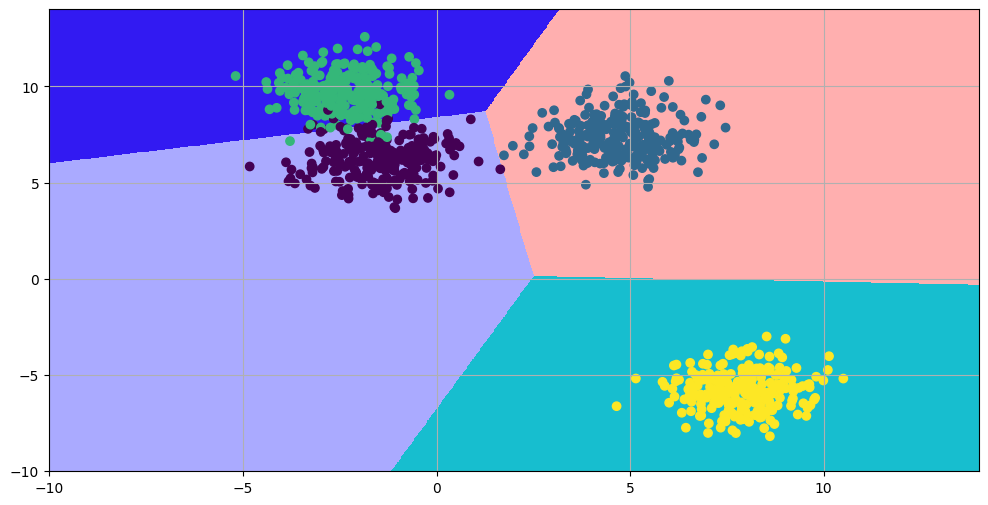

In [ ]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 6))
xx, yy = np.meshgrid(np.linspace(-10, 14, 1000), np.linspace(-10, 14, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF', '#321AF2', '#17becf']))

plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

plt.show()

## L1-reguralization:

In [ ]:
class MulticlassLogisticRegression(LogisticRegression):
    def __init__(self, learning_rate=0.1, max_iter=10000, tolerance=1e-15, regularization_strength=0.1):
        super().__init__(max_iter=max_iter, tol=tolerance)
        self._regularization_strength = regularization_strength;
        self._validation_freq = 1000;
        self._lr = learning_rate

    def fit(self, X, y):
        classes = len(set(y))
        X = self.__add_intercept(X)
        self._X = X;
        n_objects, n_features = X.shape
        y1 = np.zeros([X.shape[0], centers])
        for i in range(y.shape[0]):
            y1[i, y[i]] = 1
        self._weights = np.random.random((n_features, classes))
        for i in range(self.max_iter):
            z = np.dot(-X, self._weights)
            p = SoftMax(z)

            grad = 1 / X.shape[0] * np.dot(X.T, (y1-p))
            self._weights -= self._lr * (grad - self._regularization_strength * np.sign(self._weights))

            if i % self._validation_freq == 0:
                z = np.dot(-X, self._weights)
                p = SoftMax(z)

                if (np.isnan(np.sum(p))):
                    print(i)
                    break
                # Compute log loss and accuracy
                loss = self.__loss(y1, p)

                acc = 0
                for col in range(centers):
                    for row in range(X.shape[0]):
                        if (y1[row, col] == 1 and p[row, col] == np.max(p[row, :])):
                            acc += 1
                acc = acc/len(X)

                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

            if (np.linalg.norm(self._lr * (grad - self._regularization_strength * np.sign(self._weights))) < self.tol):
                print("Converged in {} iterations!".format(i))
                break

    def predict(self, X):
        X = self.__add_intercept(X)
        h = np.dot(-X, self._weights)
        z = SoftMax(h)
        return z.argmax(axis=1)


    def predict_proba(self, X):
        X = self.__add_intercept(X)
        h = np.dot(-X, self._weights)
        return SoftMax(h)


    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def __loss(self, y, p):
        return -np.sum(y*np.log(p))

In [ ]:
clf = MulticlassLogisticRegression(learning_rate=0.1, max_iter=10000, tolerance=1e-4, regularization_strength=0.01)

clf.fit(X, y)

print(clf._weights)

Iteration 0: Loss = 1207.5446151476572. Accuracy = 0.544
Iteration 1000: Loss = 121.00718534389523. Accuracy = 0.977
Iteration 2000: Loss = 82.20490440123268. Accuracy = 0.98
Iteration 3000: Loss = 66.58246290154304. Accuracy = 0.979
Iteration 4000: Loss = 58.42340810206704. Accuracy = 0.982
Iteration 5000: Loss = 53.65697125355588. Accuracy = 0.982
Iteration 6000: Loss = 50.7397048368574. Accuracy = 0.982
Iteration 7000: Loss = 48.950267410185766. Accuracy = 0.981
Iteration 8000: Loss = 47.902786930399856. Accuracy = 0.981
Iteration 9000: Loss = 47.37055444763253. Accuracy = 0.981
[[-14.44405443  10.67559492  15.34857723  10.22702827]
 [ 10.32892031 -10.08106578  11.21516435 -10.25653425]
 [ 10.42969926  11.77565839   6.92735402  13.02639383]]


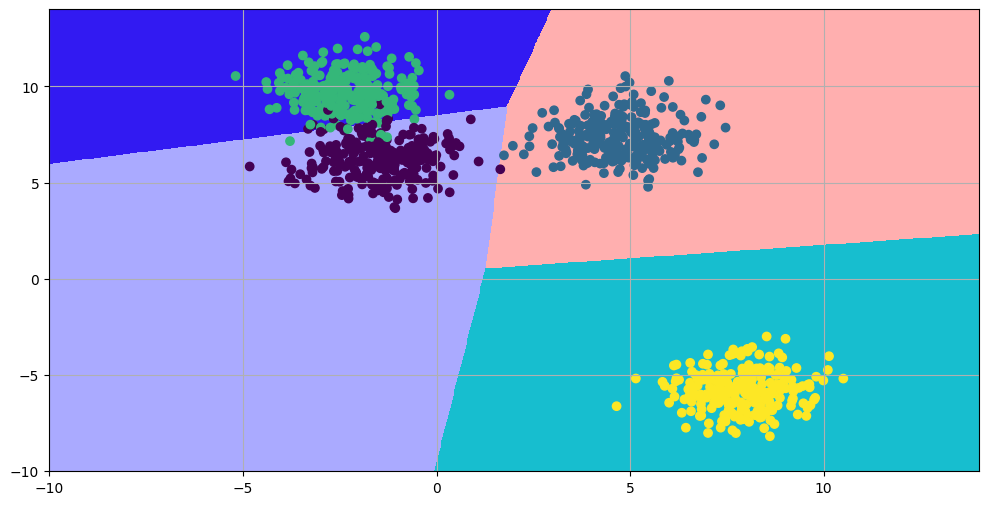

In [ ]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 6))
xx, yy = np.meshgrid(np.linspace(-10, 14, 1000), np.linspace(-10, 14, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF', '#321AF2', '#17becf']))

plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

plt.show()